<a href="https://colab.research.google.com/github/KhosrojerdiA/Transformer-MT/blob/main/Positional_Encoding_in_Transformer_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn

max_sequence_length = 10
d_model = 6

sentence is one hot encoded (each word will have one hot encoded vecotr with vocab size dim). with Max Length of Sequence

 -> feed forward layer to have -> vocab size * 512 (512 dimension, vocab size vectors)

 +

 Positional encoding

 = X1

 -> X1 spplit to Wq, Wk and Wv

 and each has q, k, v (512 dimensions) of 3 *max length




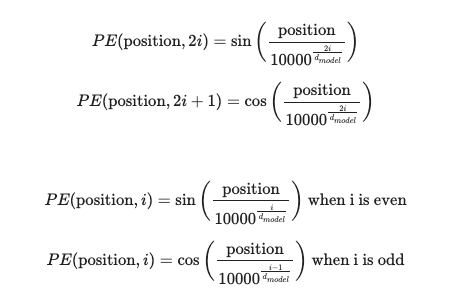

Preiodicity (sin and cos)
constrained values (-1 and +1)
easy to extrapolate

In [ ]:

even_i = torch.arange(0, d_model, 2).float()
even_i



tensor([0., 2., 4.])

In [ ]:

even_denominator = torch.pow(10000, even_i/d_model)
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [ ]:
odd_i = torch.arange(1, d_model, 2).float()

even_denominator = torch.pow(10000, (odd_i - 1)/d_model)

In [ ]:
#even_denominator and odd_denominator are the same! So we can just do one of these actions and call the resulting variable denominator
denominator = even_denominator

position = torch.arange(max_sequence_length, dtype=torch.float).reshape(max_sequence_length, 1)

position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [ ]:
even_PE = torch.sin(position / denominator)
odd_PE = torch.cos(position / denominator)
even_PE.shape

torch.Size([10, 3])

In [ ]:

stacked = torch.stack([even_PE, odd_PE], dim=2)
stacked.shape

torch.Size([10, 3, 2])

In [ ]:
PE = torch.flatten(stacked, start_dim=1, end_dim=2)
PE


tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

In [ ]:
PE.shape

torch.Size([10, 6])

In [ ]:
#Class
import torch
import torch.nn as nn

class PositionalEncoding(nn.Module):

    def __init__(self, d_model, max_sequence_length):
        super().__init__()
        self.max_sequence_length = max_sequence_length
        self.d_model = d_model

    def forward(self):
        even_i = torch.arange(0, self.d_model, 2).float()
        denominator = torch.pow(10000, even_i/self.d_model)
        position = torch.arange(self.max_sequence_length).reshape(self.max_sequence_length, 1)
        even_PE = torch.sin(position / denominator)
        odd_PE = torch.cos(position / denominator)
        stacked = torch.stack([even_PE, odd_PE], dim=2)
        PE = torch.flatten(stacked, start_dim=1, end_dim=2)
        return PE

In [ ]:
pe = PositionalEncoding(d_model=6, max_sequence_length=10)
pe.forward()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])